<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/main/01.Tensorflow_with_regression/Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
!pip install opendatasets

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import tensorflow as tf
import numpy as np

In [445]:
od.download( "https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [446]:
df = pd.read_csv("random-linear-regression/test.csv")

In [447]:
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [448]:
df.shape

(300, 2)

In [449]:
x = df['x']
y = df['y']

In [450]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [451]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


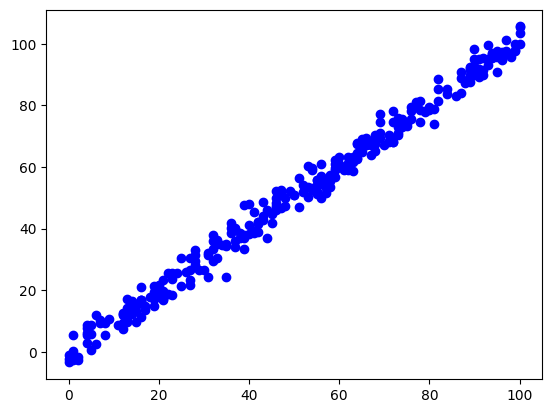

In [452]:
plt.scatter(x,y,c='b')
plt.show()

In [453]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

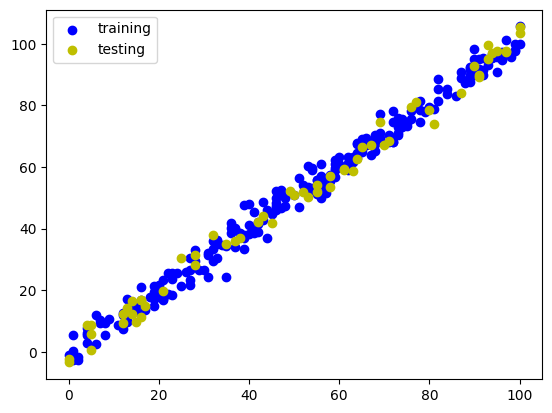

In [454]:
plt.scatter(X_train,y_train,c='b', label ="training")
plt.scatter(X_test,y_test,c='y', label ="testing")
plt.legend()
plt.show()

In [455]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , input_shape = (1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [456]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.05),
    metrics = ['mae']
)

In [457]:
model.fit(tf.expand_dims(X_train , axis =1) , y_train , epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48.6650 - mae: 48.6650
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.2926 - mae: 18.2926 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.8689 - mae: 10.8689 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.0122 - mae: 5.0122 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7512 - mae: 3.7512 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5728 - mae: 3.5728 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3318 - mae: 3.3318 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4614 - mae: 4.4614 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7814 - mae: 2.7814 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4941 - mae: 2.4941 


In [458]:
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [459]:
y_pred = model.predict(X_test)
y_pred[:5]
y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


(60, 1)

In [460]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


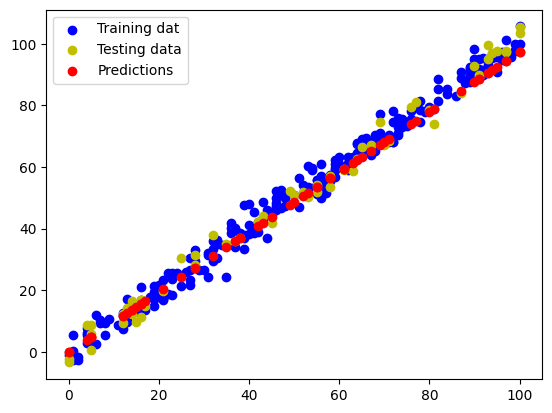

In [461]:
plt.scatter(X_train, y_train, c='b', label='Training dat')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()

plt. show()

In [462]:
model.evaluate(X_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0009 - mae: 3.0009 


[2.814138889312744, 2.814138889312744]

In [463]:
y_pred.shape

(60, 1)

In [464]:
y_pred = model.predict(X_test).squeeze()
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
MAE: 2.8141387275353833


In [465]:
y_pred.shape

(60,)

In [466]:

me = tf.keras.losses.MeanAbsoluteError()
result = me(y_test, y_pred).numpy()
result

np.float32(2.814139)

In [467]:

ms = tf.keras.losses.MeanSquaredError()
result = ms(y_test, y_pred).numpy()
result

np.float32(12.995886)